In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import calendar as c

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract("month", Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
temp_june_lst = temp_june.all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temp_june_df = pd.DataFrame(temp_june_lst, columns=['date', 'tobs', 'prcp'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_june_df.describe()

,tobs,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract("month", Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
temp_dec_lst = temp_dec.all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_dec_df = pd.DataFrame(temp_dec_lst, columns=['date', 'tobs', 'prcp'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temp_dec_df.describe()

,tobs,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


## Extra: Determine the Summary Statistics (monthly)

In [12]:
#temp_all = session.query(extract('month', Measurement.date), extract('year', Measurement.date),
#                         func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs),
#                         func.avg(Measurement.prcp), func.min(Measurement.prcp), func.max(Measurement.prcp)).\
#    group_by(extract("month", Measurement.date), extract('year', Measurement.date))

temp_all = session.query(extract('month', Measurement.date), 
                         func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs),
                         func.avg(Measurement.prcp), func.min(Measurement.prcp), func.max(Measurement.prcp)).\
    group_by(extract("month", Measurement.date))



In [13]:
temp_all.all()

[(1, 68.72611464968153, 54.0, 81.0, 0.12997530864197532, 0.0, 8.81),
 (2, 69.44223602484472, 56.0, 83.0, 0.1372714870395634, 0.0, 5.04),
 (3, 70.05906674542233, 56.0, 82.0, 0.20422733077905494, 0.0, 6.38),
 (4, 72.35726795096322, 53.0, 84.0, 0.1506394984326019, 0.0, 6.25),
 (5, 73.68090017311022, 63.0, 87.0, 0.14567733990147788, 0.0, 4.07),
 (6, 74.94411764705882, 64.0, 85.0, 0.13635959339263018, 0.0, 4.43),
 (7, 76.08240794856809, 61.0, 87.0, 0.16792224346717663, 0.0, 11.53),
 (8, 76.41245376078915, 65.0, 87.0, 0.14666219839142086, 0.0, 4.81),
 (9, 76.16486486486487, 64.0, 87.0, 0.16424945612762884, 0.0, 6.83),
 (10, 75.3913881748072, 64.0, 86.0, 0.15560553633218005, 0.0, 4.47),
 (11, 73.25268817204301, 61.0, 83.0, 0.1803801169590643, 0.0, 8.06),
 (12, 71.04152933421226, 56.0, 83.0, 0.21681850533807792, 0.0, 6.42)]

In [14]:
final_df = pd.DataFrame(temp_all, columns=['mon', 'Avg Temp', 'Min Temp', 'Max Temp', 'Avg Prec', 'Min Prec', 'Max Prec'])

In [15]:
final_df

,mon,Avg Temp,Min Temp,Max Temp,Avg Prec,Min Prec,Max Prec
0,1,68.726115,54.0,81.0,0.129975,0.0,8.81
1,2,69.442236,56.0,83.0,0.137271,0.0,5.04
2,3,70.059067,56.0,82.0,0.204227,0.0,6.38
3,4,72.357268,53.0,84.0,0.150639,0.0,6.25
4,5,73.680900,63.0,87.0,0.145677,0.0,4.07
5,6,74.944118,64.0,85.0,0.136360,0.0,4.43
6,7,76.082408,61.0,87.0,0.167922,0.0,11.53
7,8,76.412454,65.0,87.0,0.146662,0.0,4.81
8,9,76.164865,64.0,87.0,0.164249,0.0,6.83
9,10,75.391388,64.0,86.0,0.155606,0.0,4.47


<AxesSubplot:title={'center':'Average Temperatures in a Year'}, xlabel='mon'>

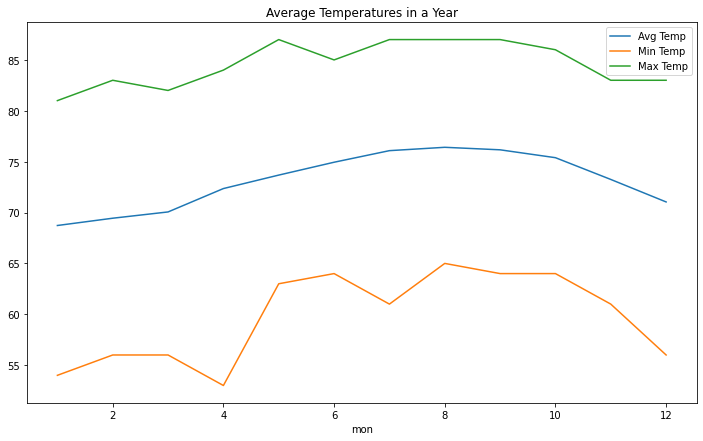

In [19]:
final_df.plot(x = 'mon', y=['Avg Temp', 'Min Temp', 'Max Temp'], title='Average Temperatures in a Year', figsize=(12,7))

<AxesSubplot:title={'center':'Average Precipitation in a Year'}, xlabel='mon'>

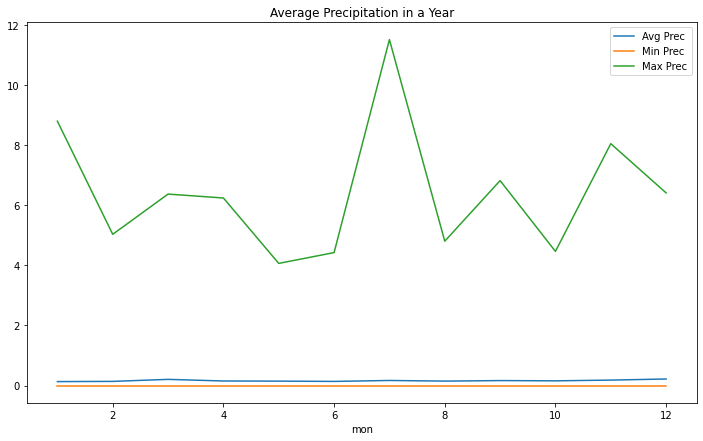

In [20]:
final_df.plot(x = 'mon', y=['Avg Prec', 'Min Prec', 'Max Prec'], title='Average Precipitation in a Year', figsize=(12,7))

<AxesSubplot:title={'center':'Box Temperatures in a Year'}>

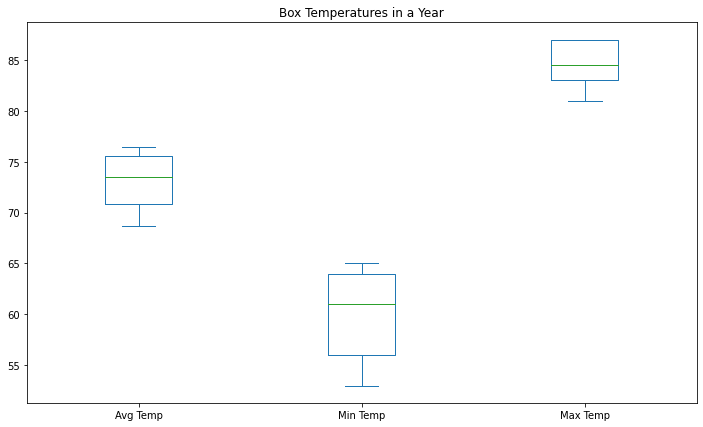

In [27]:
final_df.plot(x = 'mon', y=['Avg Temp', 'Min Temp', 'Max Temp'], kind = 'box', title='Box Temperatures in a Year', figsize=(12,7))

<AxesSubplot:title={'center':'Box Precipitation in a Year'}>

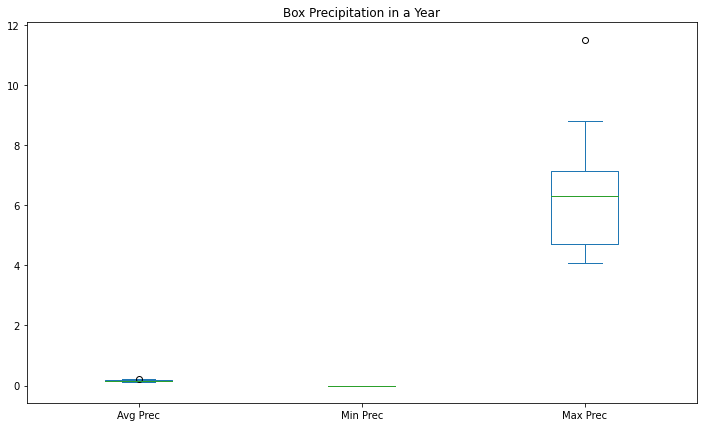

In [29]:
final_df.plot(x = 'mon', y=['Avg Prec', 'Min Prec', 'Max Prec'], kind = 'box', title='Box Precipitation in a Year', figsize=(12,7))